In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np


#LSTM Multivariat(Humidity-Resample)
#url = url filepath
#df = ped.read_csv(url)



Langka-Langkah dasar ML 

Mengumpulkan data 
Memprsiapkan data : data cleaning 
memilih dan melati sebuah model (jantung ML), buat training data , test data, validation 
Evaluate model 
increase performance


Machine learning dengan pyhton
hyperplane
dibuatkalah pemisah(margin) yang optimal.
diperlukan vektor 

import numpy[3.4]
np.linalg.norm
kita susdah tau persamaan garis y= ax + B sedangkan jika dalam hhyperlane persamaan umum bidang adalha w x =0


w x = y - ax - b


kendala : funsgi tujuan kendala maksimum kuliah gunakan fungsi laggrang masalah dijumlahakan dibagi bobot




In [3]:
url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/master/energy_efficiency_data.csv"
df = pd.read_csv(url)
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xc = scaler.fit_transform(df)


In [10]:
Xc

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.81457514,
        -0.67011624, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.81457514,
        -0.67011624, -0.34266569],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -1.81457514,
        -0.67011624, -0.34266569],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.41133622,
        -0.58185433, -0.78654401],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.41133622,
        -0.5778875 , -0.83913623],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.41133622,
        -0.56202019, -0.9001432 ]])

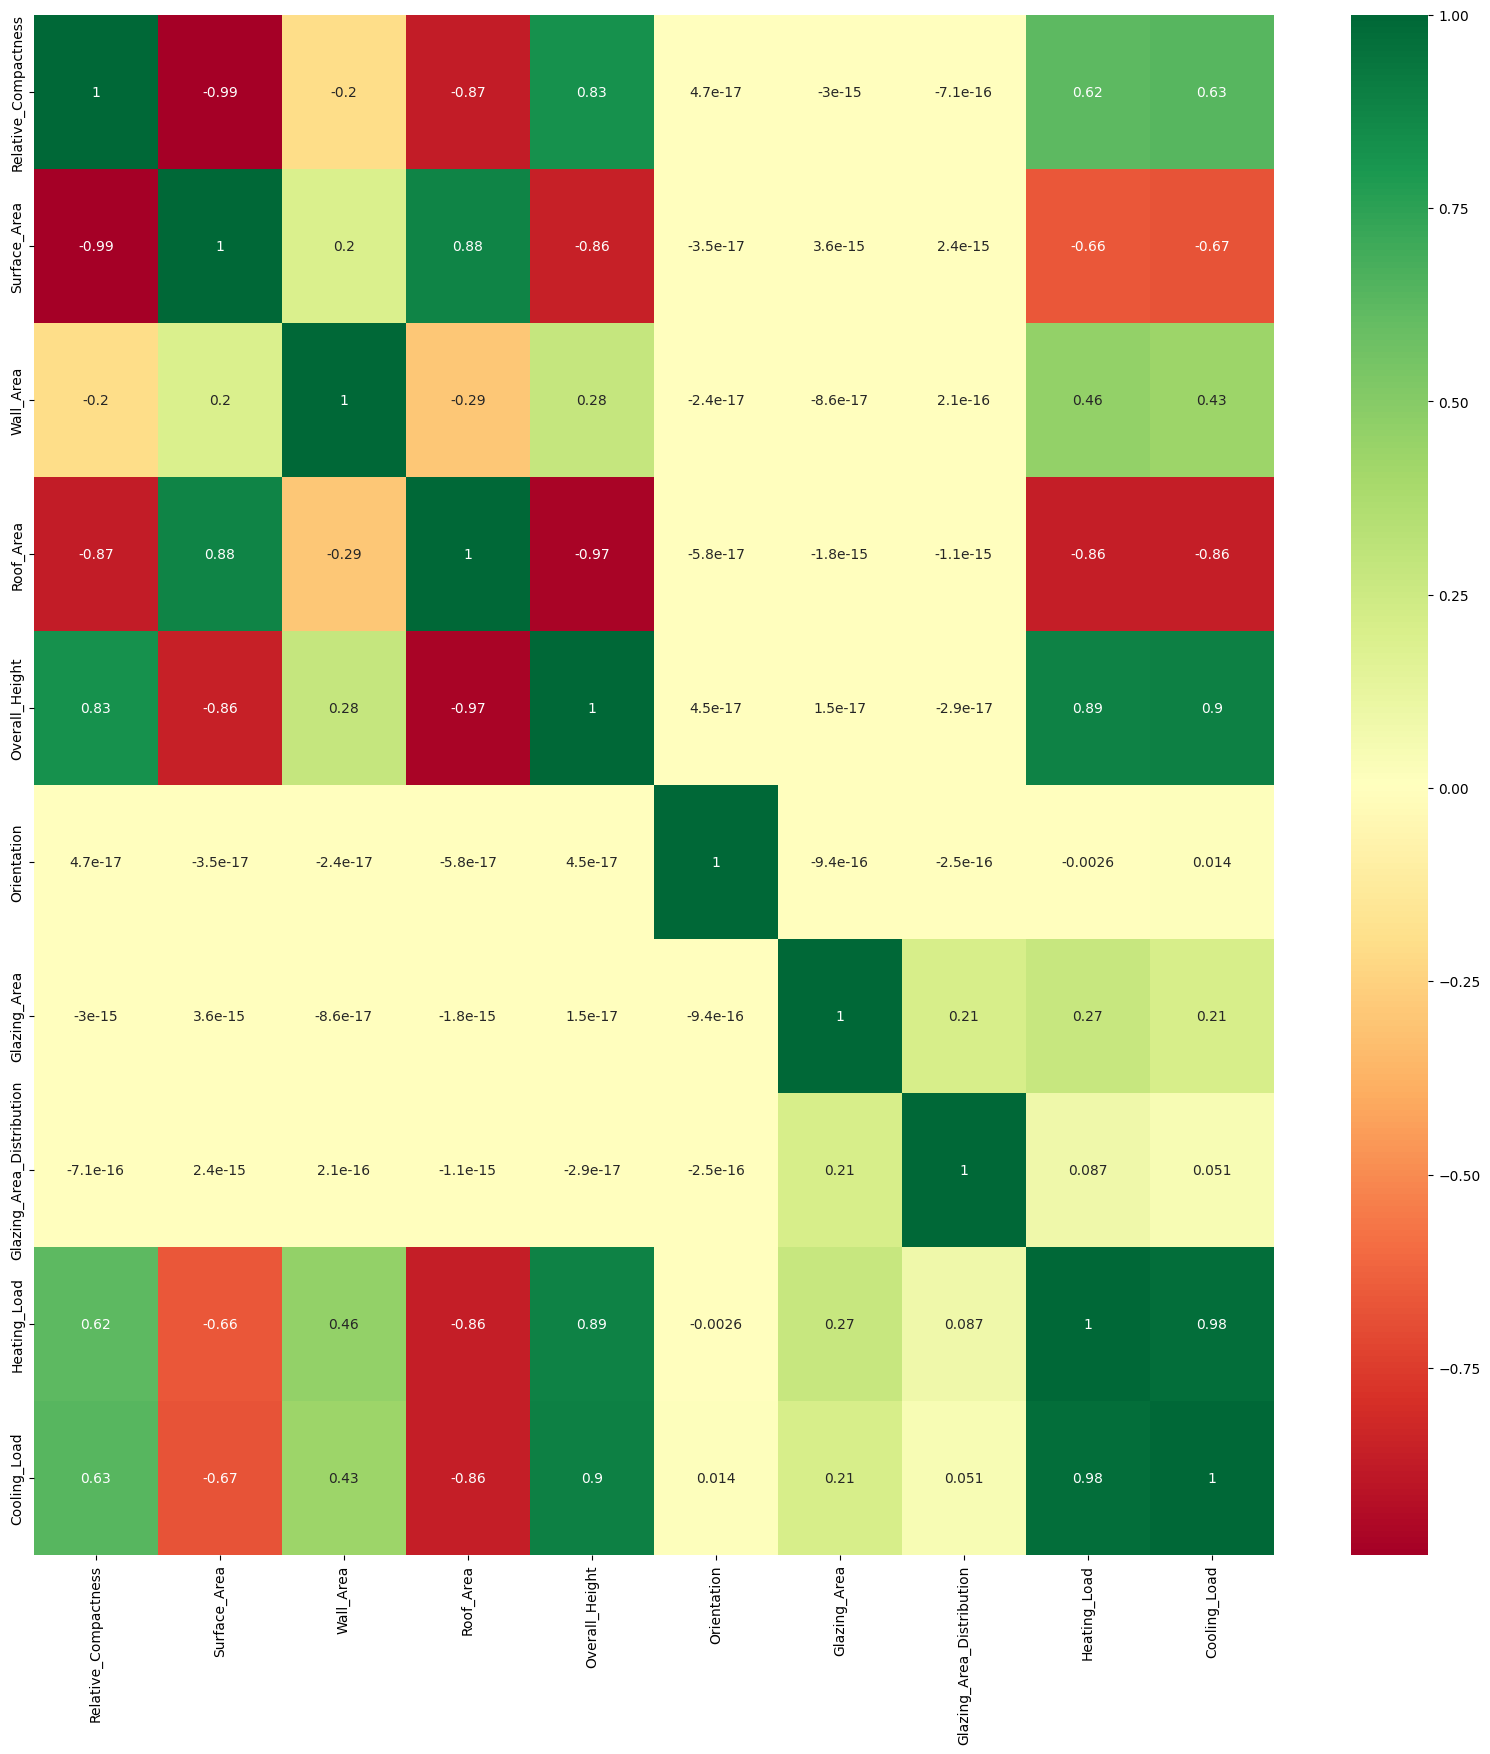

In [9]:
corrmat = df.corr()
to_coor = corrmat.index
plt.figure(figsize=(20, 20))

g = sbs.heatmap(df[to_coor].corr(), annot =True, cmap = "RdYlGn")

<Axes: >

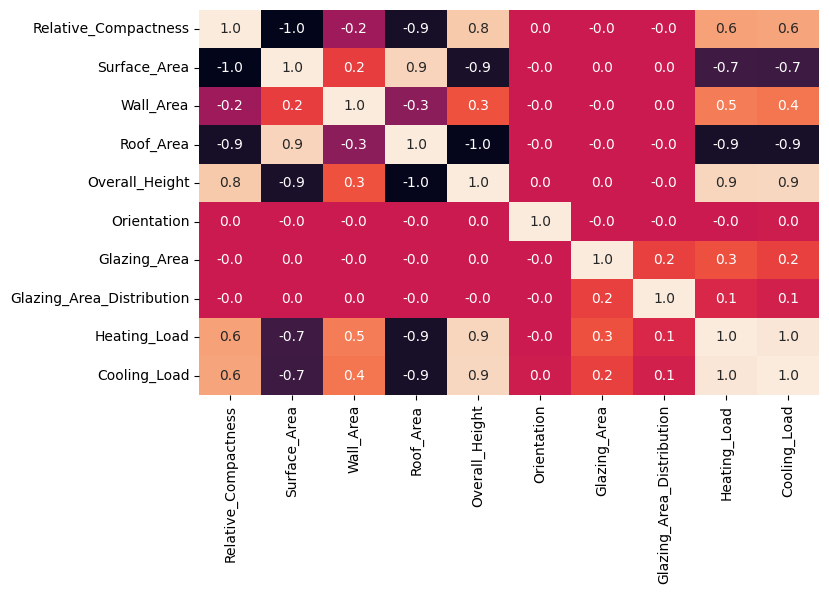

In [4]:
plt.figure(figsize = (8,5))
sbs.heatmap(df.corr(), cbar = False, annot = True, fmt=".1f")

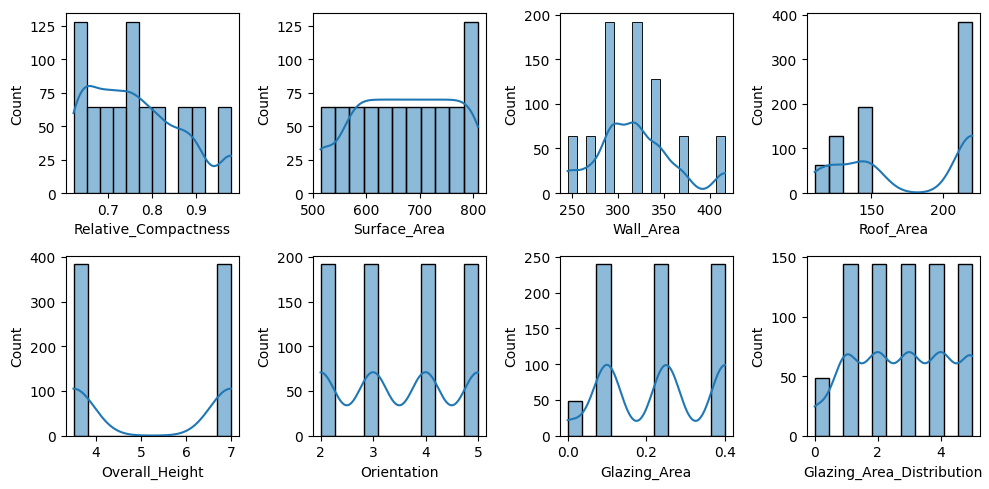

In [6]:
n_rows=2
n_cols=4
 
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:, :-2].columns):
    sbs.histplot(df[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df.iloc[:, :8]
y = df.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
   
for col in X_train.columns:
    print(f"{col} : ", X_train[f'{col}'].unique())

Relative_Compactness :  [0.82 0.64 0.86 0.9  0.66 0.79 0.62 0.76 0.69 0.74 0.98 0.71]
Surface_Area :  [612.5 784.  588.  563.5 759.5 637.  808.5 661.5 735.  686.  514.5 710.5]
Wall_Area :  [318.5 343.  294.  367.5 416.5 245.  269.5]
Roof_Area :  [147.   220.5  122.5  110.25]
Overall_Height :  [7.  3.5]
Orientation :  [2 4 5 3]
Glazing_Area :  [0.1  0.4  0.25 0.  ]
Glazing_Area_Distribution :  [1 2 4 3 5 0]


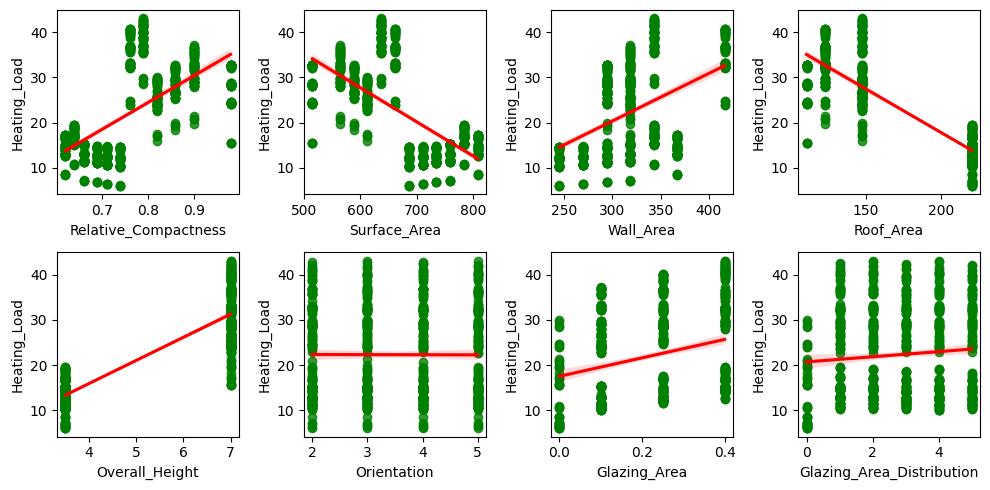

In [13]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sbs.regplot(x = df[column], y = df['Heating_Load'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

d:\BigDataAnalisis\.venv\Lib\site-packages\seaborn\regression.py:411: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, **kws)


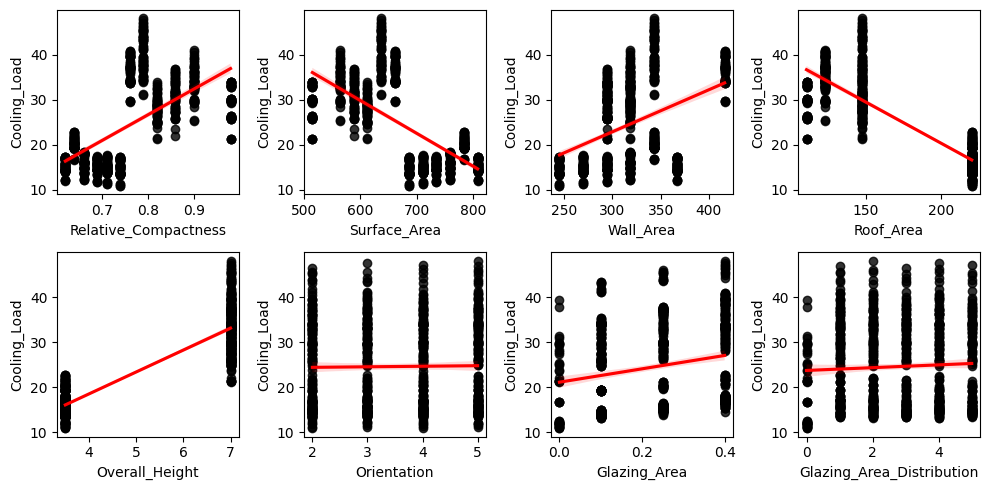

In [17]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sbs.regplot(x = df[column], y = df['Cooling_Load'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
 
def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Y1_pred = y_pred[:,0],
      Y2_pred = y_pred[:,1]   
  ).head(count).to_markdown(index = False))
 
def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614, 2) (154, 2)


In [24]:

linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))

R2 score:  0.9027041137649523
Mean squared error:  9.52336333372908
Mean absolute error:  2.188695505153828
Predictions: 
|   Heating_Load |   Cooling_Load |   Y1_pred |   Y2_pred |
|---------------:|---------------:|----------:|----------:|
|          16.47 |          16.9  |   18.8627 |   19.7543 |
|          13.17 |          16.39 |   14.0487 |   16.771  |
|          32.82 |          32.78 |   31.3154 |   32.0251 |
|          41.32 |          46.23 |   35.9003 |   36.7024 |
|          16.69 |          19.76 |   15.3348 |   17.276  |


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
specific_feature = [[0.90, 514.5, 294.0, 110.25, 7.0, 2, 0.0,0]]
specific_prediction = extra_reg.predict(specific_feature)
print(f"Predicted values for the specific features: {specific_prediction}")
#showResults(y_test,extra_reg.predict(X_test))

Predicted values for the specific features: [[17.7577 24.2695]]


d:\BigDataAnalisis\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
